OH GOD TU SĄ ODWRÓCONE OSIE
![](https://di4564baj7skl.cloudfront.net/documentation/images/Leap_Axes.png)

In [38]:
import tkinter
import tkinter as tk
from tkinter.constants import *
import cv2
import mediapipe as mp
import numpy as np
import pickle
import PIL.Image, PIL.ImageTk
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from os import listdir
from os.path import isfile, join
import tqdm

In [39]:
def swapPositions(l, pos1, pos2):
    l[pos1], l[pos2] = l[pos2], l[pos1]
    return l

def dictRewriter(leapPickleDict):
    leapPickleDict[0]["coords"] = leapPickleDict[0]["position"]
    leapPickleDict[0].pop('position', None)
    leapPickleDict[1]["coords"] = leapPickleDict[1]["position"]
    leapPickleDict[1].pop('position', None)
    
    #odwróć osie
    for el in leapPickleDict:
        el['coords'] = swapPositions(list(el['coords']), 1,2)
    
    return leapPickleDict

def plot3d(xs, ys, zs, avg3d=[]):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    # ax.grid(False)
    # ax.axis('off')
    if len(avg3d):
        plt.plot(avg3d[0],avg3d[1],avg3d[2], marker="o", markersize=8, markeredgecolor="red", markerfacecolor="green")
    ax.scatter(xs,ys,zs)
    ax.view_init(-90,-90)
    plt.show()
    
def unpickle(filepath):
    with open(filepath, "rb") as input_file:
        e = pickle.load(input_file)
    return e

def dumpPickle(data, filePath):
    with open(filePath,'wb') as f:
        pickle.dump(data, f)

In [40]:
fileNames = [f for f in listdir("../leapDataCollector/train/leapJoints") if
         isfile(join("../leapDataCollector/train/leapJoints", f))]

rightJointsOrder = ['wrist', 'palm', 
                    '00', '01', '02', '03', 
                    '10', '11', '12', '13',
                    '20', '21', '22', '23',
                    '30', '31', '32', '33',
                    '40', '41', '42', '43']
for file in tqdm.tqdm(fileNames):
    filePath = f"../leapDataCollector/train/leapJoints/{file}"
    savePath = f"leapJoints/{file}"
    jointDicts = unpickle(filePath)
    jointDicts = dictRewriter(jointDicts)
    origJointsOrder = [i['pointID'] for i in jointDicts]
    numericalJointsRightOrder = [origJointsOrder.index(i) for i in rightJointsOrder]
    myOrderMat = [jointDicts[i]['coords'] for i in numericalJointsRightOrder]
    myOrderMatScaled = preprocessing.minmax_scale(myOrderMat)
    dumpPickle(myOrderMatScaled, savePath)

100%|██████████| 22000/22000 [00:06<00:00, 3447.96it/s]


In [2]:
import pickle
with open(r"../leapDataCollector/train/leapJoints/B-2.pickle", "rb") as input_file:
     e = pickle.load(input_file)

In [28]:
myOrderMatScaled.shape

(22, 3)

In [4]:
e = dictRewriter(e)

In [6]:
e[:5]

[{'pointID': 'wrist',
  'coords': [53.09535217285156, 64.46562957763672, 129.83262634277344]},
 {'pointID': 'palm',
  'coords': [38.27452087402344, 20.386592864990234, 148.51451110839844]},
 {'pointID': '01',
  'coords': [-4.837937831878662, 42.934043884277344, 139.57275390625]},
 {'pointID': '02',
  'coords': [-15.264445304870605, 16.21870994567871, 151.9499969482422]},
 {'pointID': '03',
  'coords': [-27.788480758666992, 1.899133563041687, 161.83787536621094]}]

In [36]:
!nautilus .

Initializing nautilus-dropbox 2019.02.14
Nautilus-Share-Message: 19:33:59.969: Called "net usershare info" but it failed: Failed to execute child process “net” (Not a directory)


![](leaphandex.png)

![](leaphandnotation.png)

In [6]:
origJointsOrder = [i['pointID'] for i in e]
print(origJointsOrder)

['wrist', 'palm', '01', '02', '03', '00', '11', '12', '13', '10', '21', '22', '23', '20', '31', '32', '33', '30', '41', '42', '43', '40']


In [7]:
#MOJA notacja = to samo co mediapipe tylko na pozycji 1 wstawiłem środek dłoni (więc reszta jest przesunięta +1)
#żeby notacja pasowała mojej notacji muszę tę poprzestawiać
rightJointsOrder = ['wrist', 'palm', 
                    '00', '01', '02', '03', 
                    '10', '11', '12', '13',
                    '20', '21', '22', '23',
                    '30', '31', '32', '33',
                    '40', '41', '42', '43']
numericalJointsRightOrder = [origJointsOrder.index(i) for i in rightJointsOrder]

In [8]:
numericalJointsRightOrder

[0, 1, 5, 2, 3, 4, 9, 6, 7, 8, 13, 10, 11, 12, 17, 14, 15, 16, 21, 18, 19, 20]

In [9]:
myOrderMat = [e[i]['coords'] for i in numericalJointsRightOrder]
myOrderMat

[[53.09535217285156, 64.46562957763672, 129.83262634277344],
 [38.27452087402344, 20.386592864990234, 148.51451110839844],
 [27.81281852722168, 66.31800079345703, 117.7028579711914],
 [-4.837937831878662, 42.934043884277344, 139.57275390625],
 [-15.264445304870605, 16.21870994567871, 151.9499969482422],
 [-27.788480758666992, 1.899133563041687, 161.83787536621094],
 [11.967376708984375, 4.550275802612305, 159.0814208984375],
 [9.82556438446045, -34.71072769165039, 160.81813049316406],
 [8.741998672485352, -56.81220245361328, 160.01953125],
 [8.041332244873047, -72.37914276123047, 158.54762268066406],
 [31.867692947387695, 2.5136845111846924, 162.37197875976562],
 [29.92359161376953, -41.59970474243164, 162.41888427734375],
 [28.61623191833496, -67.57919311523438, 161.0098876953125],
 [27.677431106567383, -84.69288635253906, 159.3954620361328],
 [52.57698059082031, 4.832608699798584, 161.14044189453125],
 [46.799713134765625, -35.688446044921875, 161.1720428466797],
 [43.022789001464844

In [10]:
from sklearn import preprocessing
myOrderMatScaled = preprocessing.minmax_scale(myOrderMat)

In [11]:
myOrderMatScaled

array([[0.81674766, 0.98773353, 0.27126222],
       [0.66709007, 0.69584042, 0.68905168],
       [0.56145004, 1.        , 0.        ],
       [0.23174968, 0.84515052, 0.48908407],
       [0.12646503, 0.66824054, 0.76588064],
       [0.        , 0.57341574, 0.9870067 ],
       [0.40144615, 0.59097171, 0.92536315],
       [0.37981859, 0.33098381, 0.96420179],
       [0.36887697, 0.18462698, 0.94634244],
       [0.36180179, 0.08154209, 0.91342563],
       [0.60239529, 0.57748532, 0.99895104],
       [0.58276417, 0.28536473, 1.        ],
       [0.56956273, 0.11332755, 0.96849012],
       [0.56008292, 0.        , 0.93238616],
       [0.81151325, 0.59284133, 0.97140975],
       [0.75317564, 0.32450932, 0.97211645],
       [0.71503707, 0.15852991, 0.94450726],
       [0.68840881, 0.04694089, 0.91245686],
       [1.        , 0.6072317 , 0.8456521 ],
       [0.94929451, 0.39582296, 0.89489712],
       [0.91764613, 0.27900276, 0.89749428],
       [0.88759541, 0.17638262, 0.8845211 ]])

In [34]:
# todo rewrite this ^to one block script

In [ ]:
[i['coords'] for i in ]

In [11]:
mat = [i['coords'] for i in e]
mat

[[53.09535217285156, 64.46562957763672, 129.83262634277344],
 [38.27452087402344, 20.386592864990234, 148.51451110839844],
 [-4.837937831878662, 42.934043884277344, 139.57275390625],
 [-15.264445304870605, 16.21870994567871, 151.9499969482422],
 [-27.788480758666992, 1.899133563041687, 161.83787536621094],
 [27.81281852722168, 66.31800079345703, 117.7028579711914],
 [9.82556438446045, -34.71072769165039, 160.81813049316406],
 [8.741998672485352, -56.81220245361328, 160.01953125],
 [8.041332244873047, -72.37914276123047, 158.54762268066406],
 [11.967376708984375, 4.550275802612305, 159.0814208984375],
 [29.92359161376953, -41.59970474243164, 162.41888427734375],
 [28.61623191833496, -67.57919311523438, 161.0098876953125],
 [27.677431106567383, -84.69288635253906, 159.3954620361328],
 [31.867692947387695, 2.5136845111846924, 162.37197875976562],
 [46.799713134765625, -35.688446044921875, 161.1720428466797],
 [43.022789001464844, -60.753143310546875, 159.93746948242188],
 [40.385749816894

In [12]:
npmat = np.array(mat,dtype=np.float32)
npmat

array([[ 53.095352 ,  64.46563  , 129.83263  ],
       [ 38.27452  ,  20.386593 , 148.51451  ],
       [ -4.837938 ,  42.934044 , 139.57275  ],
       [-15.264445 ,  16.21871  , 151.95     ],
       [-27.78848  ,   1.8991336, 161.83788  ],
       [ 27.812819 ,  66.318    , 117.70286  ],
       [  9.825564 , -34.710728 , 160.81813  ],
       [  8.741999 , -56.812202 , 160.01953  ],
       [  8.041332 , -72.37914  , 158.54762  ],
       [ 11.967377 ,   4.550276 , 159.08142  ],
       [ 29.923592 , -41.599705 , 162.41888  ],
       [ 28.616232 , -67.57919  , 161.00989  ],
       [ 27.677431 , -84.69289  , 159.39546  ],
       [ 31.867693 ,   2.5136845, 162.37198  ],
       [ 46.799713 , -35.688446 , 161.17204  ],
       [ 43.02279  , -60.753143 , 159.93747  ],
       [ 40.38575  , -77.6043   , 158.5043   ],
       [ 52.57698  ,   4.8326087, 161.14044  ],
       [ 66.22168  , -24.91931  , 157.7191   ],
       [ 63.08749  , -42.560432 , 157.83524  ],
       [ 60.11152  , -58.05719  , 157.25

In [136]:
norm = np.linalg.norm(npmat)
npmat = npmat/norm  # normalized matrix
npmat

array([[ 0.06768111,  0.0821749 ,  0.1654988 ],
       [ 0.04878887,  0.02598697,  0.18931276],
       [-0.00616696,  0.0547284 ,  0.17791462],
       [-0.01945772,  0.02067413,  0.193692  ],
       [-0.03542222,  0.00242084,  0.20629616],
       [ 0.03545325,  0.08453614,  0.15003687],
       [ 0.01252473, -0.04424607,  0.20499627],
       [ 0.0111435 , -0.07241901,  0.2039783 ],
       [ 0.01025036, -0.09226233,  0.20210205],
       [ 0.01525492,  0.00580028,  0.20278248],
       [ 0.03814387, -0.05302751,  0.20703678],
       [ 0.03647736, -0.08614379,  0.20524071],
       [ 0.03528066, -0.10795876,  0.20318279],
       [ 0.04062203,  0.00320422,  0.20697698],
       [ 0.05965601, -0.04549237,  0.20544742],
       [ 0.05484153, -0.07744256,  0.2038737 ],
       [ 0.05148007, -0.09892289,  0.20204683],
       [ 0.06702033,  0.00616017,  0.20540713],
       [ 0.08441336, -0.03176486,  0.20104592],
       [ 0.08041818, -0.05425216,  0.20119396],
       [ 0.07662468, -0.07400601,  0.200

In [164]:
import numpy
avg3d = numpy.average(mat, axis=0)

In [163]:
xs = [i[0] for i in mat]
ys = [i[1] for i in mat]
zs = [i[2] for i in mat]

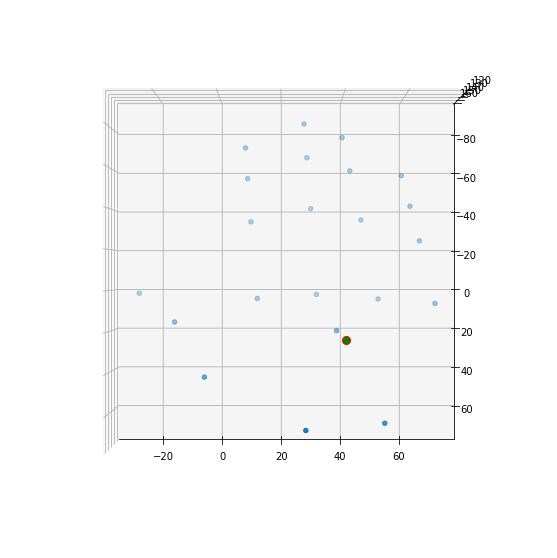

In [166]:
plot3d(xs,ys,zs, palmAvg3d)

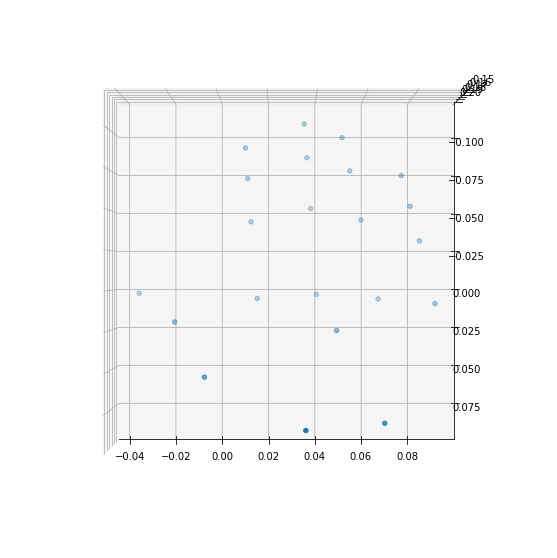

In [138]:
plot3d(npxs,npys,npzs)

In [137]:
npxs = [i[0] for i in npmat]
npys = [i[1] for i in npmat]
npzs = [i[2] for i in npmat]

In [124]:
def plot2d(xs,ys, avg2d=[]):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot()
    # ax.grid(False)
    # ax.axis('off')
    ax.scatter(xs,ys)
    if len(avg2d):
        plt.plot(avg2d[0],avg2d[1], marker="o", markersize=8, markeredgecolor="red", markerfacecolor="green")
    plt.gca().invert_yaxis()
    # ax.view_init(-90,-110)
    plt.show()

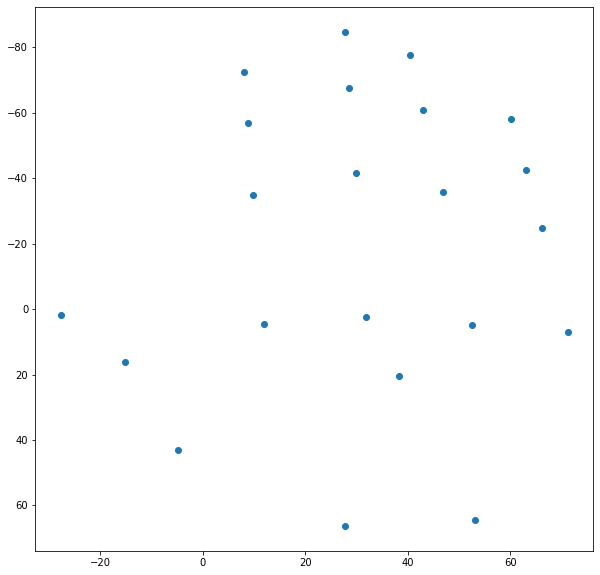

In [125]:
plot2d(xs,ys)